**Creando un Perceptrón En Python**

El concepto de Perceptrón ya existe desde 1943, fue creado por Frank Rosenblatt a partir del modelo neuronal de Warren McCulloch y Walter Pitts.
Es una red neuronal de una sola capa, también conocido como Single layer neural network. Básicamente es un clasificador lineal binario, esto quiere decir que nos permite clasificar al conjunto de entradas únicamente dentro de 2 posibilidades.

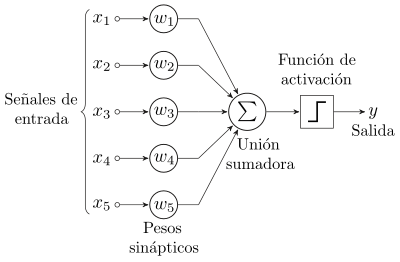

La neurona recibe un conjunto de entradas  $(x=x_1...x_m ) $
, a cada una se les asocia un peso$ (w=w_1...w_m)$ que les dará un nivel de importancia a cada entrada. Luego podemos definir $z$ que se igualará a la sumatoria ponderada de cada entrada por su correspondiente peso:

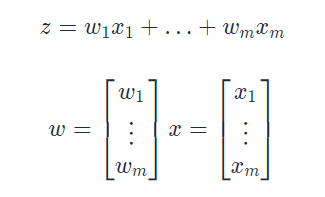

Para determinar una salida, se deberá someter a la suma ponderada de las entradas*pesos, es decir, al valor de $z$ a una función de activación. Dicha función pueden ser: Sigmoide, Tangente Hiperbólica, ReLU, entre otras. 

Para este ejemplo tomaremos la función step o también llamado escalón, al que denotaremos con$ϕ(z)ϕ(z)$.
La función step nos dice que el Perceptrón se encuentra activo si su valor es mayor o igual al valor de un umbral predefinido $(ϑ)(ϑ)$, o inactivo para cualquier otro caso. Entonces:

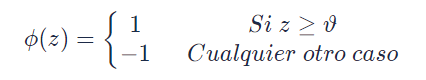

**¿Cómo aprende un Perceptrón?**

El algoritmo que utiliza un Perceptrón para aprender es bastante fácil, ya que únicamente deberá ir actualizando el valor de los pesos.
Los pesos iniciales generalmente se generan por medio de funciones matemáticas o librerías (por ejemplo en Python) que nos brindan valores aleatorios, o simplemente se pueden inicializar todos los pesos en 0(cero).
Para realizar la actualización de los pesos, se deberá aplicar la siguiente ecuación:


$w_n=w_i +α∗(y_d −y)∗x_i$

Donde:

$W_n$ : Es El Valor Del Nuevo Peso. (Valor Actualizado)

$W_i$ : El Valor Del Peso Anterior.

$Α$: Valor De La Taza De Aprendizaje.

$Y_d$ : Valor De La Salida Deseada.

$Y$: Salida Del Perceptrón.

$X_i$ : Valor De La Entrada Correspondiente.
 

*Para el ejemplo vamos a implementar un algoritmo basado en el libro Python Machine Learning de Sebastian Raschka.

Para éste caso utilizaremos uno de los dataset mas comúnmente utilizados en Machine Learning que es IRIS. 

En donde intentaremos separar mediante un Perceptrón las flores Iris-Setosa de las Iris-Versicolor.


El dataset está compuesto por 5 columnas, en donde, las primeras 4 corresponden a las características, es decir, a los datos de entrada, y la ultima a la salida deseada (Clase de Iris).
Datos de entrada:

**Largo Del Sépalo**

**Ancho Del Sépalo**

**Largo Del Pétalo**

**Ancho Del Pétalo**


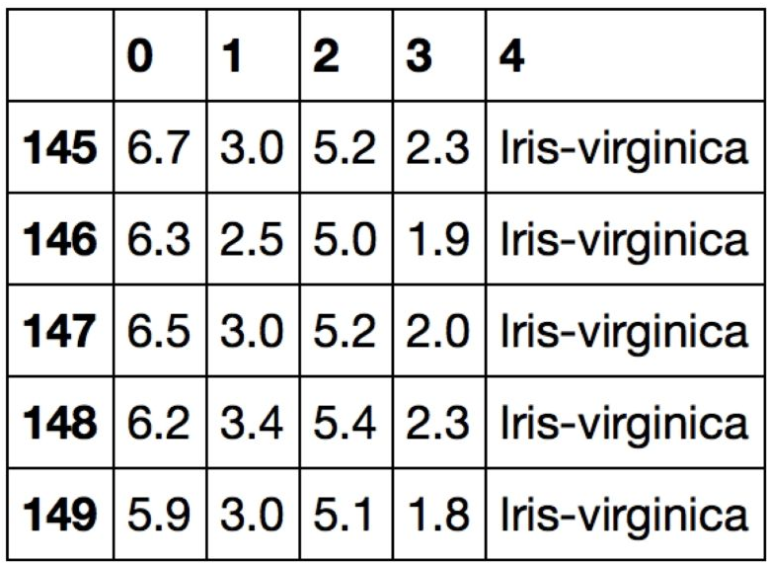


# Codigo de Python

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:

    # Se define número de iteraciones y la tasa de aprendizaje
    def __init__(self, tasa, num_iter):
        self.tasa = tasa
        self.num_iter = num_iter

    # Se entrena el perceptron por medio de actualización de pesos
    def entrenar(self, entradas, salida_deseada):
        self.pesos = np.zeros(1 + entradas.shape[1])
        self.errores_vec = []

        for i in range(self.num_iter):
            errores = 0
            for xi, target in zip(entradas, salida_deseada):
                nuevo_peso = self.tasa * (target - self.predecir(xi))
                self.pesos[1:] += nuevo_peso * xi
                self.pesos[0] += nuevo_peso

                errores += int(nuevo_peso != 0.0)
            self. errores_vec.append(errores)
        return self
    
    # Es La Función De Activación Step. Retornará 1 Si El Valor De Z Es Mayor o Igual a 0, Y Retornará -1 En Caso De Que No Lo Sea.
    def predecir(self, entradas):
        func = np.where(self.net_entradas(entradas) >= 0.0, 1, -1)
        return func
    
    #Corresponde Al Valor De ZZ. Es Decir, El Producto De Las Entradas (X) Por Los Pesos (W).
    def net_entradas(self, entradas):
        func_activ = np.dot(entradas, self.pesos[1:]) + self.pesos[0]
        return func_activ

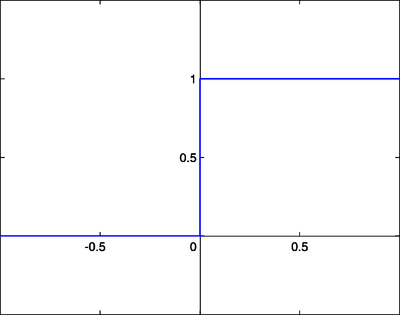

In [2]:
#Cargamos los datos
df = pd.read_csv("./lenses.data", header = None, sep=' ').drop(columns=[0])
df.columns = ['age', 'spectacle prescription', 'astigmatic', 'tear production rate', 'target']

In [3]:
df.head()

,age,spectacle prescription,astigmatic,tear production rate,target
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [4]:
df['target'].value_counts()

3    15
2     5
1     4
Name: target, dtype: int64

In [5]:
#Extraemos los primeros 100 registros y 2 variables para efecto del demo
entradas = df.iloc[0:12, [0, 3]].values
 
#Extraemos los primero 100 registros y la variable 4 
y = df.iloc[0:12, 4].values
y = np.where( y == 3, -1, 1 ) #todo aquello que no sea Iris-setosa se pone 1 sino -1
 
 
##Iniciamos la clase Perceptron
ptn = Perceptron(tasa = 0.1, num_iter = 10)
 
##Entrenamos al Perceptron
ptn.entrenar(entradas, y)

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
      
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
        Z = classifier.predecir(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)
        
        return print(Z)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_13820/787890496.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


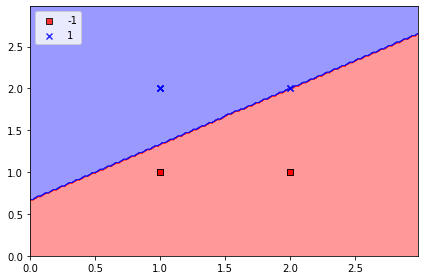

In [7]:
ptn = plot_decision_regions(X=entradas, y=y, classifier=ptn)
plt.legend(loc='upper left')
 
plt.tight_layout()
plt.show()